In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns

sns.set_theme()

In [88]:
from pathlib import Path




In [89]:
def makePlots(model, lr, graphType, log=False):
    temp = []
    graph = graphType

    #get directories of specifies files and search in the specified directory
    directory_in_str = os.getcwd() + '/ResultsData/' + graphType
    pathlist = Path(directory_in_str).glob('**/*.csv')
    #creating a list of required files to plot
    matches = [model, lr]
    Adam = [model, 'Adam']


    for path in pathlist:
        path_in_str = str(path)

        # find files that have model and learning rate requirements and also adam optimiser
        if all(x in path_in_str for x in matches): #or all(x in path_in_str for x in Adam):
            temp.append(path_in_str)
    
    #plot graphs
    plt.figure(figsize=(7,7))
    for i in temp:
        _, fileName = os.path.split(i)
        #split filename
        ModelName, opt, lr, acc = fileName.split('-')
        
        letterList = list(graphType)
        firstWord = ''.join(letterList[0:5]).capitalize()
        secondWord = ''.join(letterList[5:len(letterList)]).capitalize()

        #remove the .csv from accuracy values
        temp = acc.split('.')
        acc = temp[0] + "." + temp[1]
    
        df = pd.read_csv(i, index_col=0)
        if log:
            plt.plot(np.log10(df), label=ModelName + ' ' + opt + ' ' + acc)
            plt.title(f"{model} log-{firstWord} {secondWord} graph, Learning Rate: {lr}")
        else:
            plt.plot(df, label=ModelName + ' ' + opt + ' ' + acc)
            plt.title(f"{model} {firstWord} {secondWord} graph, Learning Rate: {lr}")
        plt.xlabel('Epochs')
        if 'loss' in graphType:
            if log:
                plt.ylabel('Log-Loss')
            else:
                plt.ylabel("Loss")
        else:
            plt.ylabel("Accuracy")
        plt.legend()
        plt.savefig(f'{model} {firstWord}-{secondWord}-{lr}.png')
    return 




# CNN plots


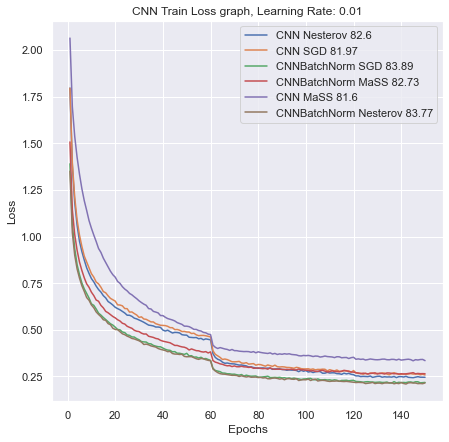

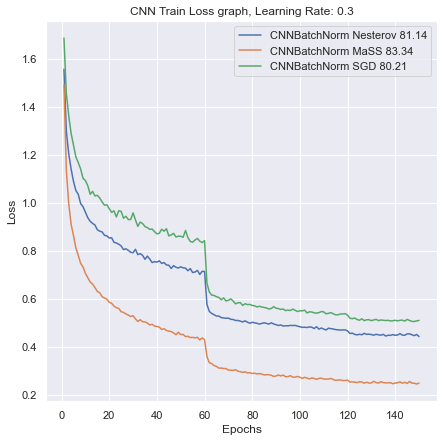

In [90]:
model = 'CNN'
lr = '0.01'
graphType = 'trainloss'

makePlots(model, lr, graphType)

model = 'CNN'
lr = '0.3'
graphType = 'trainloss'

makePlots(model, lr, graphType)


# ResNet plots


# FCN plots






